In [48]:
from skimage.io import imshow, imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import closing
from skimage.measure import label, regionprops, regionprops_table
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import os

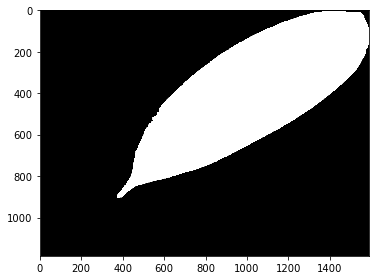

In [49]:
# get the filenames of the leaves under the directory “Leaves”
image_path_list = os.listdir("input/Lengkuas")
# looking at the first image
i = 1
image_path = image_path_list[i]
image = rgb2gray(imread("input/Lengkuas/"+image_path))
imshow(image)

c:\Users\Bagus\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


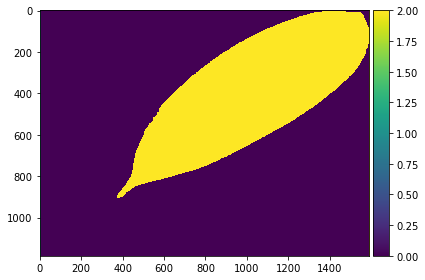

In [50]:
label_img = label(image)
imshow(label_img)

In [51]:
table = pd.DataFrame(regionprops_table(label_img, image,
                                       ['convex_area', 'area',
                                        'eccentricity', 'extent',                   
                                        'inertia_tensor',
                                        'major_axis_length', 
                                        'minor_axis_length']))
table['convex_ratio'] = table['area']/table['convex_area']
table['label'] = image_path[:]
table

,convex_area,area,eccentricity,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,major_axis_length,minor_axis_length,convex_ratio,label
0,5925,5925,0.999991,1.000000,2.000000,-0.000000,-0.000000,117018.666667,1368.319651,5.656854,1.00000,AG-S-002.png
1,996340,485756,0.927539,0.336552,89223.888127,44904.950636,44904.950636,43986.774891,1367.538436,511.086328,0.48754,AG-S-002.png


In [57]:
image_path_list = os.listdir("input/Lengkuas")
df = pd.DataFrame()
for i in range(len(image_path_list)):
    image_path = image_path_list[i]
    image = rgb2gray(imread("input/Lengkuas/"+image_path))
    label_img = label(image)
    
    table = pd.DataFrame(regionprops_table(label_img, image,
                            ['area', 'eccentricity',                         
                             'major_axis_length', 'minor_axis_length']))
    table['label'] = image_path[0:2]
    
    if (i!=11):
        table = table.iloc[[-1]]
    else :
        table = table.iloc[[0]]
        
    df = pd.concat([df, table], axis=0)

df.reset_index(inplace=True)
df.drop('index', axis = 1, inplace=True)
df

,area,eccentricity,major_axis_length,minor_axis_length,label
0,234172,0.982898,1280.906948,235.882028,AG
1,485756,0.927539,1367.538436,511.086328,AG
2,422570,0.968715,1638.089181,406.537211,AG
3,424978,0.898483,1114.998143,489.492558,AG
4,240596,0.995325,1786.570658,172.549904,AG
5,261570,0.989996,1543.832537,217.828527,AG
6,301364,0.993116,1817.192552,212.859686,AG
7,352851,0.971845,1916.487980,451.567561,AG
8,249332,0.992215,1603.745659,199.725797,AG
9,194075,0.986445,1235.094314,202.665756,AG


In [58]:
df.shape

(25, 5)

In [59]:
from pathlib import Path  
filepath = Path('csv/lengkuas.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath, index=False)  